In [1]:
import numpy as np
import pandas as pd

In [2]:
tr = pd.read_csv('train_data.csv')

In [3]:
tr.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   farm_id          object 
 2   ingredient_type  object 
 3   yield            float64
dtypes: float64(1), object(3)
memory usage: 616.9+ MB


In [5]:
tr.shape

(20216100, 4)

In [7]:
tr.isnull().sum()

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

In [8]:
tr.nunique()

date                  8784
farm_id               1434
ingredient_type          4
yield              1688175
dtype: int64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Yield by each type

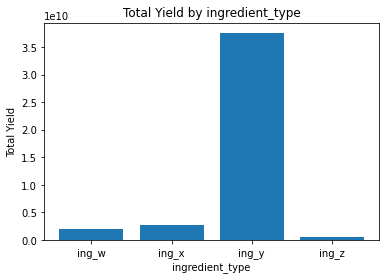

In [10]:
# Group the data by farm ID and calculate the total yield for each farm
farm_yield = tr.groupby('ingredient_type')['yield'].sum()

# Create a bar chart to show the total yield of each farm
plt.bar(farm_yield.index, farm_yield.values)
plt.xlabel('ingredient_type')
plt.ylabel('Total Yield')
plt.title('Total Yield by ingredient_type')
plt.show()

In [4]:
fe = pd.read_csv('farm_data-1646897931981.csv')

In [13]:
fe.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [14]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   farm_id                     1449 non-null   object 
 1   operations_commencing_year  675 non-null    float64
 2   num_processing_plants       355 non-null    float64
 3   farm_area                   1449 non-null   float64
 4   farming_company             1449 non-null   object 
 5   deidentified_location       1449 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.0+ KB


In [15]:
fe.shape

(1449, 6)

In [16]:
fe.describe()

,operations_commencing_year,num_processing_plants,farm_area
count,675.000000,355.000000,1449.000000
mean,1967.957037,7.740845,8557.460363
std,31.054030,3.333683,10290.860757
min,1900.000000,5.000000,26.291549
25%,1949.000000,5.000000,2137.883836
50%,1970.000000,7.000000,5357.994719
75%,1995.000000,9.000000,10746.647428
max,2017.000000,30.000000,81290.125000


In [17]:
fe.isnull().sum()

farm_id                          0
operations_commencing_year     774
num_processing_plants         1094
farm_area                        0
farming_company                  0
deidentified_location            0
dtype: int64

In [18]:
fe.nunique()

farm_id                       1434
operations_commencing_year     116
num_processing_plants           18
farm_area                     1397
farming_company                 16
deidentified_location           16
dtype: int64

### Farm area distribution

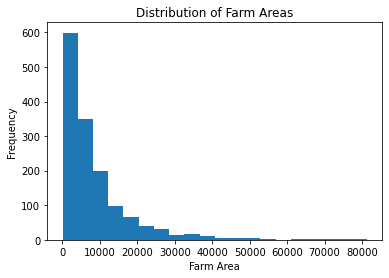

In [19]:
plt.hist(fe['farm_area'], bins=20)
plt.xlabel('Farm Area')
plt.ylabel('Frequency')
plt.title('Distribution of Farm Areas')
plt.show()

### Number of farms by farming company

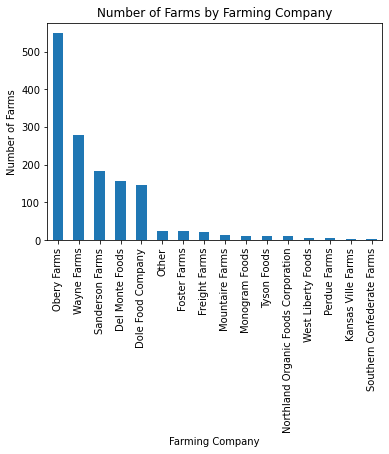

In [20]:
fe['farming_company'].value_counts().plot(kind='bar')
plt.xlabel('Farming Company')
plt.ylabel('Number of Farms')
plt.title('Number of Farms by Farming Company')
plt.show()

### Area distribution by each farming company

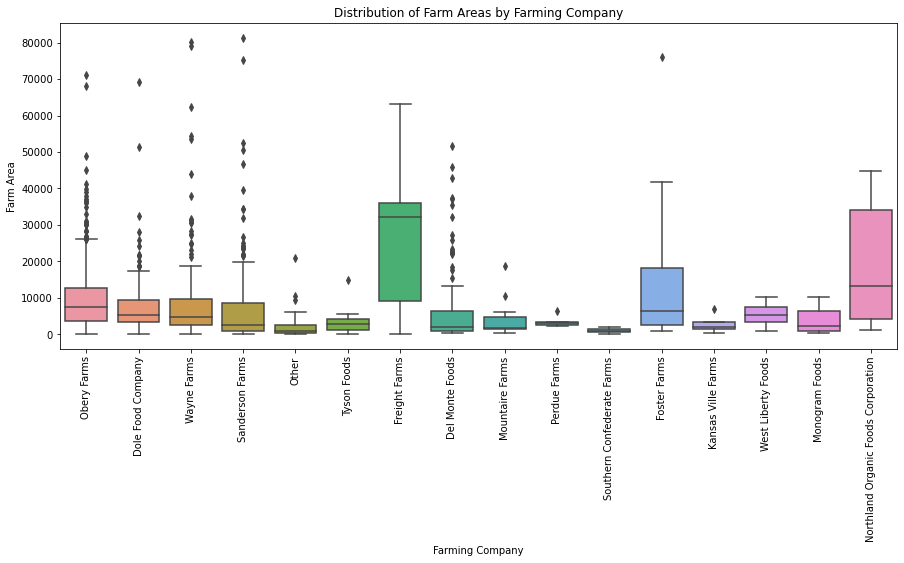

In [21]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='farming_company', y='farm_area', data=fe)
plt.xlabel('Farming Company')
plt.ylabel('Farm Area')
plt.title('Distribution of Farm Areas by Farming Company')
plt.xticks(rotation=90) 
plt.show()

### Relationship between Year Operations Commenced and Farm Area

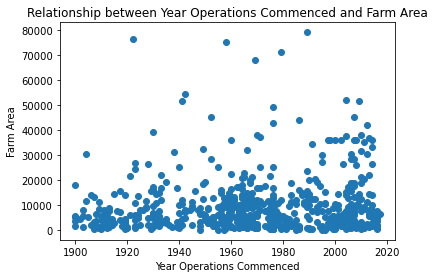

In [22]:
plt.scatter(fe['operations_commencing_year'], fe['farm_area'])
plt.xlabel('Year Operations Commenced')
plt.ylabel('Farm Area')
plt.title('Relationship between Year Operations Commenced and Farm Area')
plt.show()

In [5]:
fe.drop_duplicates(subset=['farm_id'], inplace=True)

In [24]:
fe.shape

(1434, 6)

In [6]:
trfe = pd.merge(tr, fe, how="left", on=["farm_id"])

In [26]:
trfe.head()

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,2004.0,NaN,252.696160,Obery Farms,location 7369
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0,1991.0,NaN,499.446528,Obery Farms,location 7369
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [27]:
trfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date                        object 
 1   farm_id                     object 
 2   ingredient_type             object 
 3   yield                       float64
 4   operations_commencing_year  float64
 5   num_processing_plants       float64
 6   farm_area                   float64
 7   farming_company             object 
 8   deidentified_location       object 
dtypes: float64(4), object(5)
memory usage: 1.5+ GB


In [28]:
trfe.shape

(20216100, 9)

In [29]:
trfe.describe()

,yield,operations_commencing_year,num_processing_plants,farm_area
count,2.021610e+07,8.146761e+06,3.509778e+06,2.021610e+07
mean,2.117121e+03,1.967869e+03,8.184475e+00,9.992956e+03
std,1.532356e+05,3.038299e+01,3.989325e+00,1.091217e+04
min,0.000000e+00,1.900000e+03,5.000000e+00,2.629155e+01
25%,1.830000e+01,1.951000e+03,5.000000e+00,2.996679e+03
50%,7.877500e+01,1.969000e+03,7.000000e+00,6.698492e+03
75%,2.679840e+02,1.992000e+03,1.000000e+01,1.287654e+04
max,2.190470e+07,2.017000e+03,3.000000e+01,8.129012e+04


In [30]:
trfe.isnull().sum()

date                                 0
farm_id                              0
ingredient_type                      0
yield                                0
operations_commencing_year    12069339
num_processing_plants         16706322
farm_area                            0
farming_company                      0
deidentified_location                0
dtype: int64

In [31]:
trfe.nunique()

date                             8784
farm_id                          1434
ingredient_type                     4
yield                         1688175
operations_commencing_year        116
num_processing_plants              18
farm_area                        1382
farming_company                    16
deidentified_location              16
dtype: int64

### Number of processing plants vs farming company

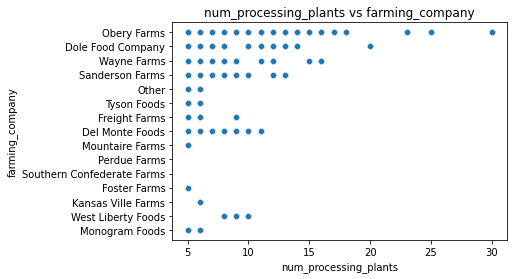

In [32]:
sns.scatterplot(data=trfe, x='num_processing_plants', y='farming_company')
plt.title('num_processing_plants vs farming_company')
plt.xlabel('num_processing_plants')
plt.ylabel('farming_company')
plt.show()

### Location

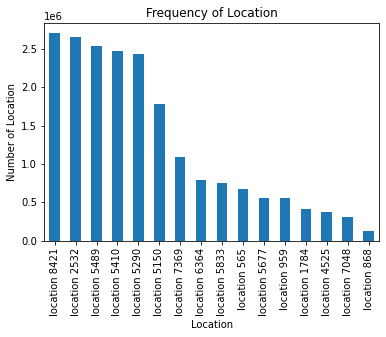

In [63]:
trfe['deidentified_location'].value_counts().plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Number of Location')
plt.title('Frequency of Location')
plt.show()

### Number of preocessing units per location

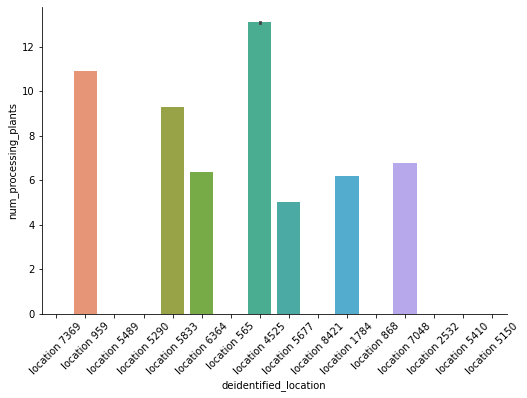

In [68]:
g = sns.catplot(x="deidentified_location", y="num_processing_plants", data=train, kind="bar", height=5, aspect=1.5)

# rotate x-labels by 45 degrees
g.set_xticklabels(rotation=45)
plt.show()

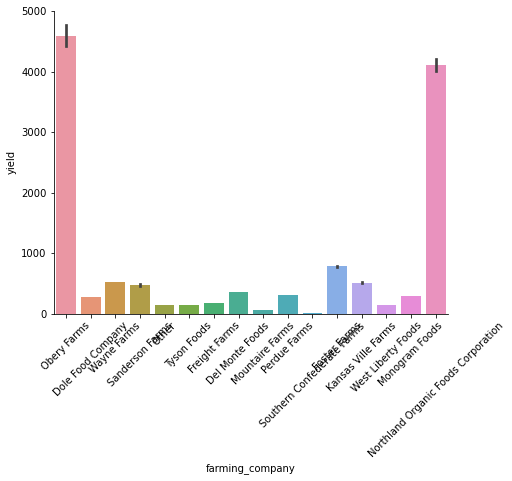

In [7]:
g = sns.catplot(x="farming_company", y="yield", data=trfe, kind="bar", height=5, aspect=1.5)

# rotate x-labels by 45 degrees
g.set_xticklabels(rotation=45)
plt.show()

In [33]:
tw = pd.read_csv('train_weather-1646897968670.csv')

In [34]:
tw.shape

(139773, 9)

In [35]:
tw.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [36]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              139773 non-null  object 
 1   deidentified_location  139773 non-null  object 
 2   temp_obs               139718 non-null  float64
 3   cloudiness             70600 non-null   float64
 4   wind_direction         133505 non-null  float64
 5   dew_temp               139660 non-null  float64
 6   pressure_sea_level     129155 non-null  float64
 7   precipitation          89484 non-null   float64
 8   wind_speed             139469 non-null  float64
dtypes: float64(7), object(2)
memory usage: 9.6+ MB


In [37]:
tw.describe()

,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,139718.000000,70600.000000,133505.000000,139660.000000,129155.000000,89484.000000,139469.000000
mean,14.418106,2.149306,180.526632,7.350158,1016.158038,0.983047,3.560527
std,10.626595,2.599150,111.523629,9.790235,7.629684,8.463678,2.335874
min,-28.900000,0.000000,0.000000,-35.000000,968.200000,-1.000000,0.000000
25%,7.200000,0.000000,80.000000,0.600000,1011.800000,0.000000,2.100000
50%,15.000000,2.000000,190.000000,8.300000,1016.400000,0.000000,3.100000
75%,22.200000,4.000000,280.000000,14.400000,1020.800000,0.000000,5.000000
max,47.200000,9.000000,360.000000,26.100000,1045.500000,343.000000,19.000000


In [38]:
tw.isnull().sum()

timestamp                    0
deidentified_location        0
temp_obs                    55
cloudiness               69173
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
dtype: int64

In [39]:
tw.

timestamp                8784
deidentified_location      16
temp_obs                  619
cloudiness                 10
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [8]:
duplicates = tw['deidentified_location'].duplicated()
print(sum(duplicates))

139757


In [40]:
trfe.rename(columns = {'date':'timestamp'},inplace = True)

In [41]:
train = pd.merge(trfe, tw, how="left", on=["deidentified_location", "timestamp"])

In [42]:
train.head()

,timestamp,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,2004.0,NaN,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0,1991.0,NaN,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0,2002.0,NaN,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0,1975.0,NaN,10833.140121,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


In [43]:
train.shape

(20216100, 16)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   timestamp                   object 
 1   farm_id                     object 
 2   ingredient_type             object 
 3   yield                       float64
 4   operations_commencing_year  float64
 5   num_processing_plants       float64
 6   farm_area                   float64
 7   farming_company             object 
 8   deidentified_location       object 
 9   temp_obs                    float64
 10  cloudiness                  float64
 11  wind_direction              float64
 12  dew_temp                    float64
 13  pressure_sea_level          float64
 14  precipitation               float64
 15  wind_speed                  float64
dtypes: float64(11), object(5)
memory usage: 2.6+ GB


In [13]:
train.describe(include='all')

,timestamp,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,20216100,20216100,20216100,2.021610e+07,8.146761e+06,3.509778e+06,2.021610e+07,20216100,20216100,2.012053e+07,1.139292e+07,1.876168e+07,2.011703e+07,1.898089e+07,1.649315e+07,2.007340e+07
unique,8784,1434,4,NaN,NaN,NaN,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-12-27 22:00:00,fid_63700,ing_w,NaN,NaN,NaN,NaN,Obery Farms,location 8421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2370,51227,12060910,NaN,NaN,NaN,NaN,8128927,2704239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.117121e+03,1.967869e+03,8.184475e+00,9.992956e+03,NaN,NaN,1.602571e+01,1.903210e+00,1.729328e+02,7.775267e+00,1.016091e+03,7.942560e-01,3.375189e+00
std,NaN,NaN,NaN,1.532356e+05,3.038299e+01,3.989325e+00,1.091217e+04,NaN,NaN,1.093330e+01,2.403621e+00,1.140793e+02,1.017447e+01,7.053797e+00,7.455458e+00,2.264521e+00
min,NaN,NaN,NaN,0.000000e+00,1.900000e+03,5.000000e+00,2.629155e+01,NaN,NaN,-2.890000e+01,0.000000e+00,0.000000e+00,-3.500000e+01,9.682000e+02,-1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,1.830000e+01,1.951000e+03,5.000000e+00,2.996679e+03,NaN,NaN,8.900000e+00,0.000000e+00,7.000000e+01,1.000000e-01,1.011600e+03,0.000000e+00,2.100000e+00
50%,NaN,NaN,NaN,7.877500e+01,1.969000e+03,7.000000e+00,6.698492e+03,NaN,NaN,1.670000e+01,0.000000e+00,1.800000e+02,8.900000e+00,1.016000e+03,0.000000e+00,3.100000e+00
75%,NaN,NaN,NaN,2.679840e+02,1.992000e+03,1.000000e+01,1.287654e+04,NaN,NaN,2.440000e+01,4.000000e+00,2.800000e+02,1.610000e+01,1.020500e+03,0.000000e+00,4.600000e+00


In [21]:
train.isnull().sum()

timestamp                            0
farm_id                              0
ingredient_type                      0
yield                                0
operations_commencing_year    12069339
num_processing_plants         16706322
farm_area                            0
farming_company                      0
deidentified_location                0
temp_obs                         95574
cloudiness                     8823176
wind_direction                 1454415
dew_temp                         99066
pressure_sea_level             1235209
precipitation                  3722952
wind_speed                      142702
dtype: int64

In [44]:
train.nunique()

timestamp                        8784
farm_id                          1434
ingredient_type                     4
yield                         1688175
operations_commencing_year        116
num_processing_plants              18
farm_area                        1382
farming_company                    16
deidentified_location              16
temp_obs                          619
cloudiness                         10
wind_direction                     43
dew_temp                          522
pressure_sea_level                709
precipitation                     128
wind_speed                         58
dtype: int64

In [38]:
(12069339/20216100)*100  

59.70161900663332

In [23]:
value = "Obery Farms"
value_in_column = train[train['farming_company'] == value]['deidentified_location'].values[1]
print(value_in_column)

location 7369


In [15]:
train.operations_commencing_year

0           2008.0
1           2004.0
2           1991.0
3           2002.0
4           1975.0
             ...  
20216095    1914.0
20216096       NaN
20216097    1997.0
20216098    2001.0
20216099    2001.0
Name: operations_commencing_year, Length: 20216100, dtype: float64

In [16]:
train.operations_commencing_year.value_counts()

1976.0    536602
1964.0    251954
1966.0    228062
2006.0    194814
1968.0    187867
           ...  
2017.0      8782
1918.0      8782
1926.0      8782
1944.0      8779
1972.0      8518
Name: operations_commencing_year, Length: 116, dtype: int64

In [45]:
train.operations_commencing_year.max()

2017.0

In [18]:
train.operations_commencing_year.min()

1900.0

In [46]:
train.operations_commencing_year.max() - train.operations_commencing_year.min()

117.0

In [35]:
train['wind_speed'].value_counts()

0.0     2387509
2.1     2323581
2.6     2200187
1.5     2087307
3.1     1984521
3.6     1765339
4.1     1446065
4.6     1217918
5.1      964669
5.7      773461
6.2      638206
6.7      484157
7.2      387634
7.7      272293
8.2      207516
8.8      154068
9.3      107231
1.0       86593
9.8       73105
4.0       49393
10.3      49259
5.0       47467
6.0       40266
3.0       39607
0.5       39562
10.8      39278
7.0       30356
11.3      28591
2.0       23389
8.0       21338
11.8      18567
9.0       15699
12.4      12199
10.0      10909
12.9       8076
11.0       7236
13.4       6022
13.9       4395
12.0       4160
14.4       2808
13.0       2702
14.9       1941
15.4       1662
8.7        1626
14.0       1258
16.0       1128
2.2         882
15.0        629
17.0        418
1.3         356
16.5        284
18.5        153
18.0        105
19.0        105
12.8         53
3.2          53
1.6          53
6.1          53
Name: wind_speed, dtype: int64

In [34]:
train['dew_temp'].value_counts()

 10.0    400816
 22.2    366758
 13.3    365775
 13.9    365392
 22.8    365118
          ...  
-19.7        56
-25.3        53
-23.2        48
-24.6        48
-24.3        48
Name: dew_temp, Length: 522, dtype: int64

In [33]:
train['wind_direction'].value_counts()

0.0      2376297
170.0     646642
300.0     627747
290.0     589924
180.0     575759
310.0     568637
160.0     555256
270.0     549114
190.0     545320
320.0     543487
280.0     529474
330.0     498540
200.0     489697
350.0     483525
340.0     476674
150.0     474753
260.0     471888
140.0     458507
210.0     453557
80.0      433204
230.0     429320
130.0     427219
100.0     423810
360.0     421598
70.0      413044
90.0      411341
120.0     401182
250.0     401057
220.0     400822
110.0     395751
240.0     370627
60.0      354107
10.0      337716
20.0      324271
30.0      312719
50.0      305101
40.0      283452
202.0        281
174.0         53
176.0         53
84.0          53
198.0         53
196.0         53
Name: wind_direction, dtype: int64

In [32]:
train['temp_obs'].value_counts()

 24.4    396941
 25.0    386705
 25.6    382952
 23.3    380104
 20.0    379532
          ...  
 33.6        55
 33.7        55
-23.4        53
-21.2        48
-18.5        48
Name: temp_obs, Length: 619, dtype: int64

In [31]:
train['deidentified_location'].value_counts()

location 8421    2704239
location 2532    2659061
location 5489    2539096
location 5410    2476590
location 5290    2440262
location 5150    1785961
location 7369    1085446
location 6364     787287
location 5833     752455
location 565      668133
location 5677     559540
location 959      553357
location 1784     411407
location 4525     366681
location 7048     307126
location 868      119459
Name: deidentified_location, dtype: int64

In [30]:
train['farming_company'].value_counts()

Obery Farms                            8128927
Wayne Farms                            4392277
Sanderson Farms                        2256542
Dole Food Company                      2169437
Del Monte Foods                        1727055
Foster Farms                            373611
Other                                   242222
Freight Farms                           213796
Monogram Foods                          125713
Perdue Farms                            114090
Tyson Foods                             112657
Mountaire Farms                         111861
Northland Organic Foods Corporation      96519
West Liberty Foods                       77627
Kansas Ville Farms                       56203
Southern Confederate Farms               17563
Name: farming_company, dtype: int64

In [29]:
train['farm_area'].value_counts()

36012.733114    61488
14000.017585    52317
5117.747561     51227
18667.278499    45808
5999.954449     43523
                ...  
13295.348330     2657
7562.025491      2327
8151.495026      1685
786.238089       1012
4598.698500       479
Name: farm_area, Length: 1382, dtype: int64

In [28]:
train['yield'].value_counts()

0.0000      1873976
20.0000       23363
2.9307        23181
36.6000       22154
8.7921        21787
             ...   
27.8031           1
58.9751           1
90.4884           1
370.9390          1
55.6241           1
Name: yield, Length: 1688175, dtype: int64

In [27]:
train['ingredient_type'].value_counts()

ing_w    12060910
ing_x     4182440
ing_y     2708713
ing_z     1264037
Name: ingredient_type, dtype: int64

In [26]:
train['farm_id'].value_counts()

fid_63700     51227
fid_68761     41733
fid_103446    35136
fid_109814    35136
fid_122174    35135
              ...  
fid_60652      2657
fid_118770     2327
fid_73322      1685
fid_20058      1012
fid_19864       479
Name: farm_id, Length: 1434, dtype: int64

In [19]:
train['timestamp'].value_counts()

2016-12-27 22:00:00    2370
2016-12-27 19:00:00    2369
2016-12-27 20:00:00    2369
2016-12-27 17:00:00    2369
2016-12-27 21:00:00    2369
                       ... 
2016-02-26 01:00:00    1887
2016-02-23 09:00:00    1871
2016-03-23 16:00:00    1822
2016-03-13 03:00:00    1767
2016-03-13 02:00:00    1557
Name: timestamp, Length: 8784, dtype: int64

In [20]:
train['precipitation'].value_counts()

 0.0      14547753
-1.0       1090454
 3.0        254696
 5.0        119103
 8.0         72431
            ...   
 162.0          54
 201.0          54
 83.0           54
 98.0           54
 73.0           46
Name: precipitation, Length: 128, dtype: int64

In [22]:
train['cloudiness'].value_counts()

0.0    5746008
2.0    2435326
4.0    1847735
6.0     552743
8.0     550601
7.0     121835
9.0      74081
1.0      24940
3.0      21258
5.0      18397
Name: cloudiness, dtype: int64

In [23]:
train['wind_speed'].value_counts()

0.0     2387509
2.1     2323581
2.6     2200187
1.5     2087307
3.1     1984521
3.6     1765339
4.1     1446065
4.6     1217918
5.1      964669
5.7      773461
6.2      638206
6.7      484157
7.2      387634
7.7      272293
8.2      207516
8.8      154068
9.3      107231
1.0       86593
9.8       73105
4.0       49393
10.3      49259
5.0       47467
6.0       40266
3.0       39607
0.5       39562
10.8      39278
7.0       30356
11.3      28591
2.0       23389
8.0       21338
11.8      18567
9.0       15699
12.4      12199
10.0      10909
12.9       8076
11.0       7236
13.4       6022
13.9       4395
12.0       4160
14.4       2808
13.0       2702
14.9       1941
15.4       1662
8.7        1626
14.0       1258
16.0       1128
2.2         882
15.0        629
17.0        418
1.3         356
16.5        284
18.5        153
18.0        105
19.0        105
12.8         53
3.2          53
1.6          53
6.1          53
Name: wind_speed, dtype: int64

In [86]:
train['operations_commencing_year'].value_counts()

1976.0    536602
1964.0    251954
1966.0    228062
2006.0    194814
1968.0    187867
           ...  
2017.0      8782
1918.0      8782
1926.0      8782
1944.0      8779
1972.0      8518
Name: operations_commencing_year, Length: 116, dtype: int64

In [87]:
train['num_processing_plants'].value_counts()

5.0     917144
6.0     691052
8.0     378287
7.0     331688
10.0    310893
9.0     250528
12.0    175258
11.0    122652
13.0     86416
15.0     61465
17.0     43911
14.0     26351
25.0     26343
23.0     26343
30.0     26321
16.0     17559
20.0      8784
18.0      8783
Name: num_processing_plants, dtype: int64

In [24]:
train['pressure_sea_level'].value_counts()

1015.2    124978
1016.2    124135
1015.8    122046
1016.1    121928
1017.7    120930
           ...  
972.9         34
969.4         34
970.8         34
971.9         34
968.3         34
Name: pressure_sea_level, Length: 709, dtype: int64

/Users/moukuhdutta/tensorflow-test/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='operations_commencing_year'>

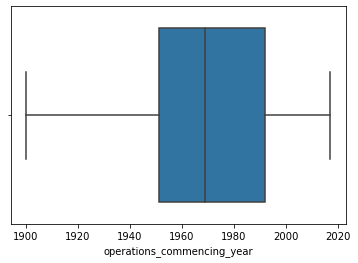

In [37]:
import seaborn as sns
sns.boxplot(train.operations_commencing_year)

/Users/moukuhdutta/tensorflow-test/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='operations_commencing_year', ylabel='Density'>

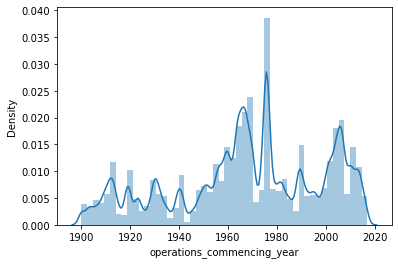

In [89]:
sns.distplot(train.operations_commencing_year)

/Users/moukuhdutta/tensorflow-test/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pressure_sea_level'>

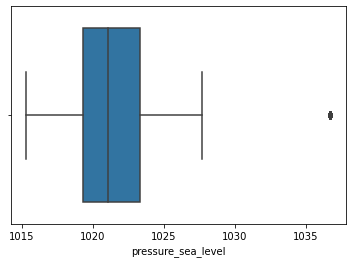

In [90]:
sns.boxplot(train.pressure_sea_level)

/Users/moukuhdutta/tensorflow-test/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure_sea_level', ylabel='Density'>

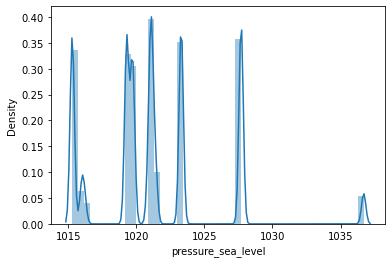

In [92]:
sns.distplot(train.pressure_sea_level)

/Users/moukuhdutta/tensorflow-test/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_processing_plants'>

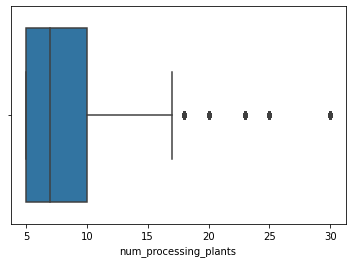

In [40]:
sns.boxplot(train.num_processing_plants)

In [47]:
train.head(2)

,timestamp,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,2004.0,NaN,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


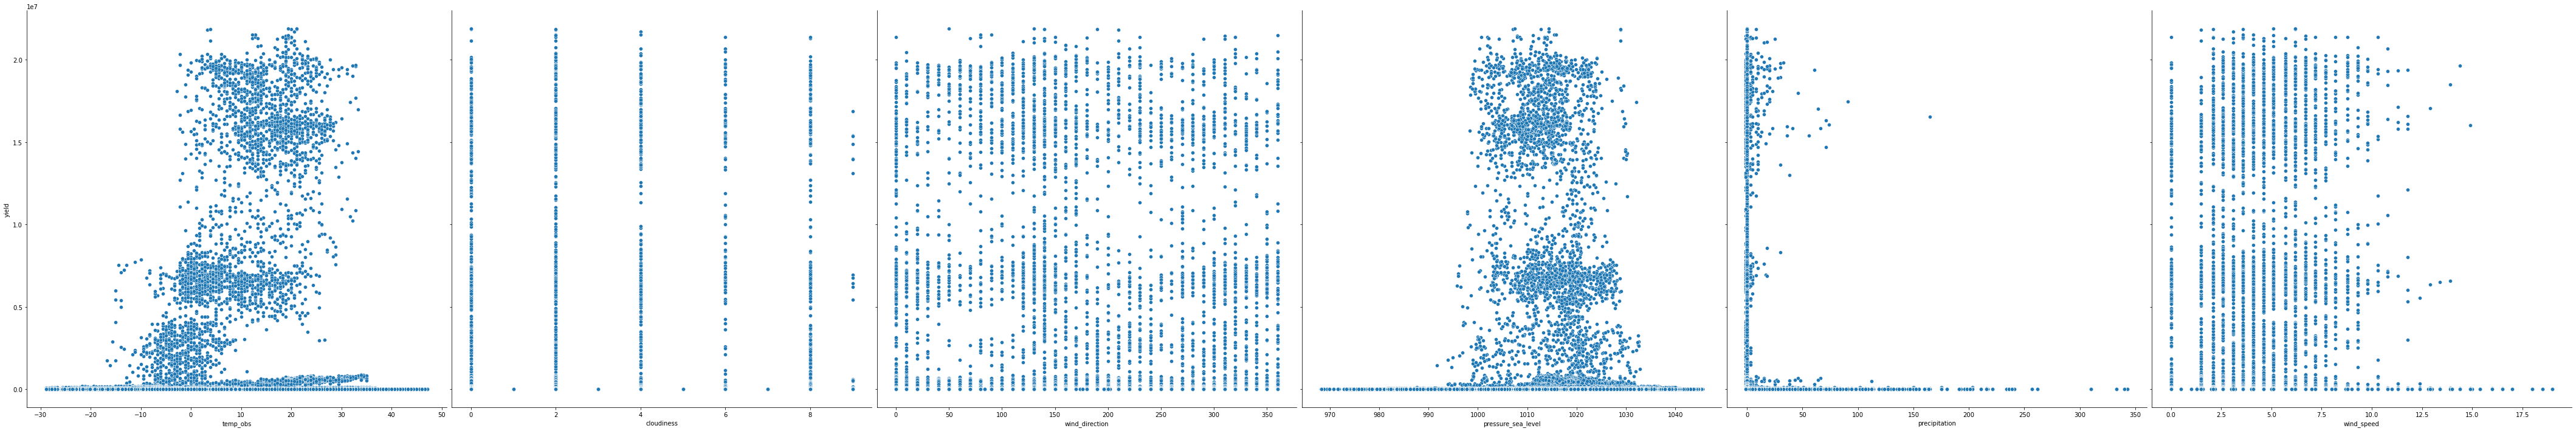

In [50]:
sns.pairplot(train, x_vars=["temp_obs", "cloudiness", "wind_direction", "pressure_sea_level", "precipitation", "wind_speed"], y_vars=["yield"], height=10)
plt.show()

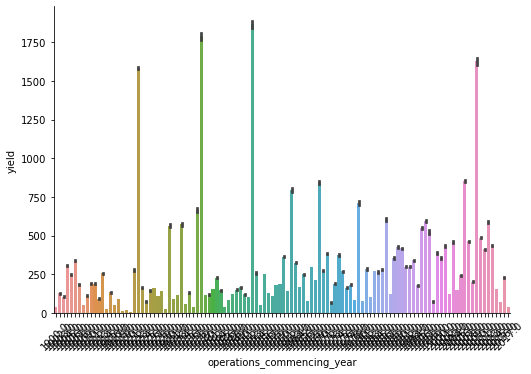

In [69]:
g = sns.catplot(x="operations_commencing_year", y="yield", data=train, kind="bar", height=5, aspect=1.5)

# rotate x-labels by 45 degrees
g.set_xticklabels(rotation=45)
plt.show()

In [70]:
train['Unix Sec'] = pd.to_datetime(train['timestamp']).astype(int)/ 10**9
train['Unix Sec'] = train['Unix Sec'].astype('int64')

/var/folders/hk/d9j983wj2t35c0rlbmr4ldjw0000gn/T/ipykernel_20291/1620550994.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  train['Unix Sec'] = pd.to_datetime(train['timestamp']).astype(int)/ 10**9


In [71]:
train.drop(['timestamp', 'operations_commencing_year', 'num_processing_plants', 'farm_id'], axis=1, inplace=True)

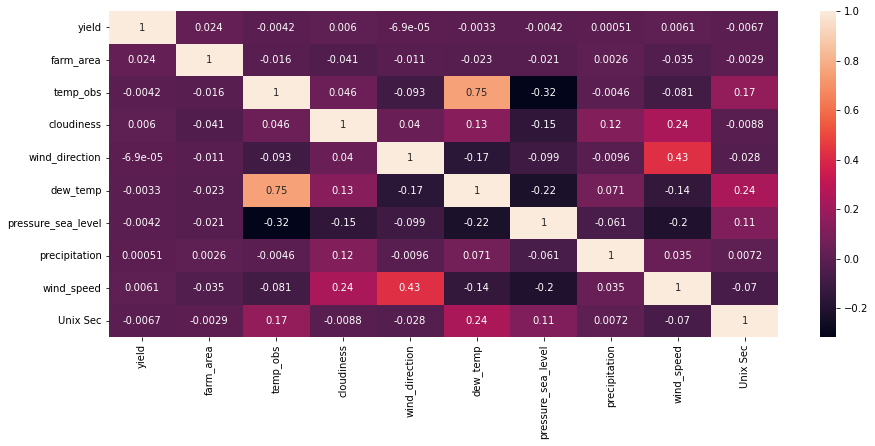

In [72]:
corrMatrix = train.corr(method = 'pearson',min_periods = 1)
plt.figure(figsize=(15,6))
sns.heatmap(corrMatrix, annot=True)
plt.show()